In [1]:
from QuiltLoader import QuiltLoader as ql

# QuiltLoader can handle both 'org/pkg'
data = ql('aics/random_sample')

# or preload
from quilt.data.aics import random_sample
data = ql(random_sample)

# we have subscriptable nodes now
fov = data['fovs'][19]
img = fov['image']
print(img)

TiffFile '3b2b023d4b2e...0dc874977ed'  362.06 MiB  LittleEndian  OME  455 Pages


In [2]:
# can pass different load functions in
import tifffile as tfle
loaders = {'image': tfle.imread}

# no org given, defaults to aics
data = ql('random_sample', load_functions=loaders)
fov = data['fovs'][19]
img = fov['image']
print(img.shape)

(65, 7, 624, 924)


In [3]:
# look at those no loads
meta = fov['info']
print(meta.keys())

# you can even do inline opening and continuation
print(fov['info']['cell_segs'])

dict_keys(['plate_type', 'plate_id', 'plate_barcode', 'population_id', 'passage', 'clone', 'parent_plate_id', 'image_ids', 'seeding_density', 'cellbatch', 'source_plate_id', 'cell_viability', 'well_type', 'well_name', 'concentration', 'coating_type', 'seed_date', 'colony_ids', 'location', 'content_type', 'instrument', 'channels', 'plates', 'lines', 'wells', 'cell_segs', 'nuclei_segs', 'structure_segs'])
['cell_plate_3500000922_well_E7_100X_20170522_3_Scene_07_P48_E0']


In [4]:
# iterable nodes too
for i, line in enumerate(data['lines']):
    print(i, line['line'])

0 AICS-10
1 AICS-11
2 AICS-12
3 AICS-13
4 AICS-16
5 AICS-17
6 AICS-23
7 AICS-24
8 AICS-25


In [5]:
# can even slice
for i, fov in enumerate(data['fovs'][0:6:2]):
    print(i, fov)

0 <GroupNode>
image/
info/

1 <GroupNode>
image/
info/

2 <GroupNode>
image/
info/

3 <GroupNode>
image/
info/



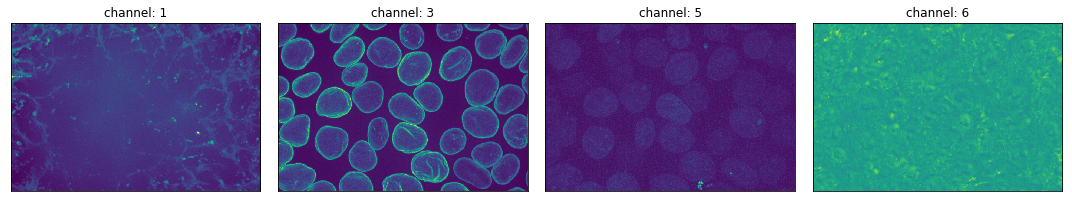

In [6]:
ql.display_channels(img)

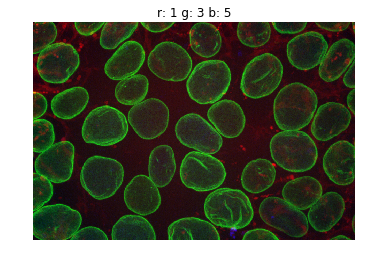

In [7]:
ql.display_rgb(img)

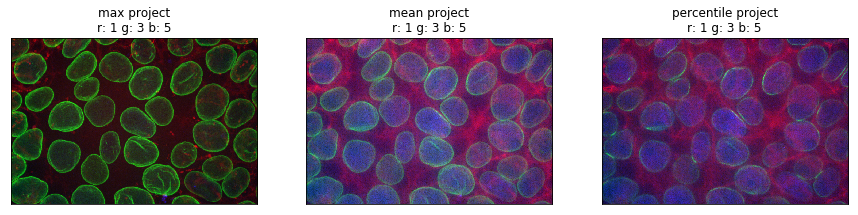

In [8]:
ql.display_rgb(img, use='all')

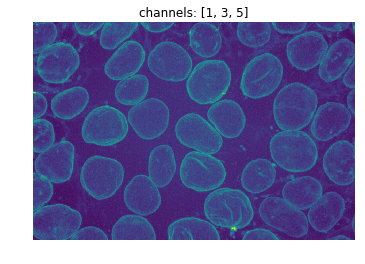

In [9]:
ql.display_stack(img)

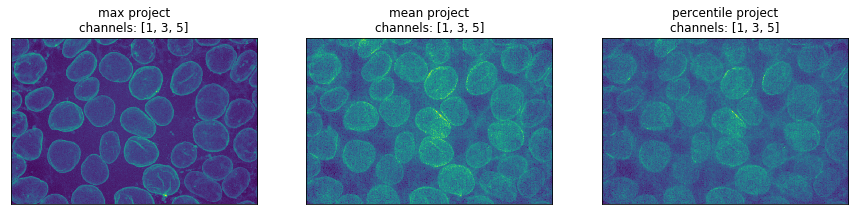

In [14]:
ql.display_stack(img, use='all')

In [11]:
cell_seg = data['cell_segs'][0]['image']
nuc_seg = data['nuclei_segs'][0]['image']
struct_seg = data['structure_segs'][0]['image']

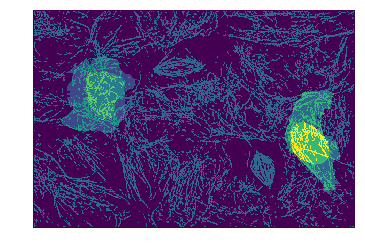

In [12]:
ql.display_icell([cell_seg, nuc_seg, struct_seg])

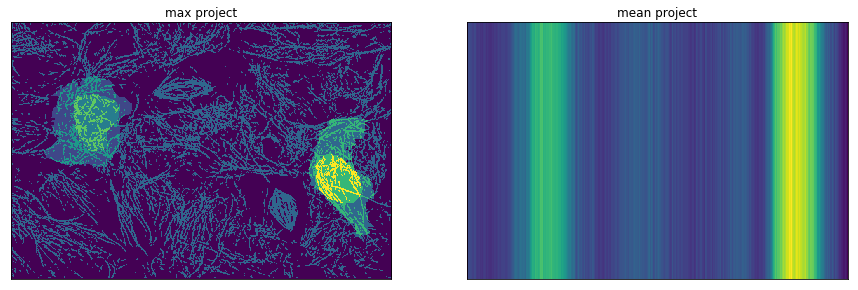

In [13]:
# there is a bug with this i dont know why but it is time for me to go
# bye bye
ql.display_icell([cell_seg, nuc_seg, struct_seg], use='all')